In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df= pd.read_csv('/content/laptop_data.csv')

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [ ]:
df['Ram']=df['Ram'].str.replace('GB','')

In [ ]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [ ]:
df['Weight']=df['Weight'].str.replace('kg','')

In [ ]:
df['Weight']=df['Weight'].astype('float32')
df['Ram']=df['Ram'].astype('int32')

In [ ]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [ ]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [ ]:
df.sample(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
897,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04,47952.0000,0
583,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.93,81912.1392,0


In [ ]:
df['Ips']=df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [ ]:
df['Ips'].value_counts()

,count
Ips,
0,938
1,365


In [ ]:
 new=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [ ]:
new[0]

,0
0,IPS Panel Retina Display 2560
1,1440
2,Full HD 1920
3,IPS Panel Retina Display 2880
4,IPS Panel Retina Display 2560
...,...
1298,IPS Panel Full HD / Touchscreen 1920
1299,IPS Panel Quad HD+ / Touchscreen 3200
1300,1366
1301,1366


In [ ]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [ ]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [ ]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [ ]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [ ]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [ ]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [ ]:
df.sample(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
148,MSI,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.90,108105.12,0,0,127.335675
228,Asus,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD + 500GB HDD,Nvidia GeForce GTX 950M,Windows 10,2.69,47472.48,0,0,127.335675


In [ ]:
df['Price'].corr(df['ppi'])


np.float64(0.4734873076608601)

In [ ]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [ ]:
df['cpu_brand'] = df['Cpu'].apply(lambda x: x.split()[0])

In [ ]:
df['cpu_family']=df['Cpu'].apply(lambda x: 'i3' if 'i3' in x else
                                                 'i5' if 'i5' in x else
                                                 'i7' if 'i7' in x else
                                                 'i9' if 'i9' in x else
                                                 'other').value_counts()

In [ ]:
import re

def get_generation(cpu):
    match = re.search(r'(\d{4,5})', cpu)  # find first 4-5 digit number
    if match:
        num = match.group(1)
        return int(str(num)[0])  # first digit is generation (7xxx → 7th gen)
    return None

df['cpu_gen'] = df['Cpu'].apply(get_generation)


In [ ]:
df['cpu_speed'] = df['Cpu'].str.extract(r'(\d+\.\d+)GHz').astype(float)


In [ ]:
df.drop(columns=['Cpu','cpu_family'],inplace=True)

In [ ]:
df.sample(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu_brand,cpu_gen,cpu_speed
809,Lenovo,Notebook,4,1TB HDD,Nvidia GeForce 920M,Windows 10,2.4,32447.52,0,0,141.211998,Intel,7.0,2.5
373,Lenovo,Notebook,4,128GB SSD,AMD Radeon R5,Windows 10,2.6,26053.92,0,0,106.113062,AMD,7.0,2.2


In [ ]:

df['Price'].corr(df['cpu_speed'])


np.float64(0.432642005733991)

In [ ]:
df['cpu_speed'].fillna(df['cpu_speed'].median(), inplace=True)
df['cpu_gen'].fillna(df['cpu_gen'].median(), inplace=True)


/tmp/ipython-input-1560703434.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cpu_speed'].fillna(df['cpu_speed'].median(), inplace=True)
/tmp/ipython-input-1560703434.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Memory       1303 non-null   object 
 4   Gpu          1303 non-null   object 
 5   OpSys        1303 non-null   object 
 6   Weight       1303 non-null   float32
 7   Price        1303 non-null   float64
 8   Touchscreen  1303 non-null   int64  
 9   Ips          1303 non-null   int64  
 10  ppi          1303 non-null   float64
 11  cpu_brand    1303 non-null   object 
 12  cpu_gen      1303 non-null   float64
 13  cpu_speed    1303 non-null   float64
dtypes: float32(1), float64(4), int32(1), int64(2), object(6)
memory usage: 132.5+ KB


In [ ]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'[^\d]', '', regex=True)

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'[^\d]', '', regex=True)

df["first"] = pd.to_numeric(df["first"])
df["second"] = pd.to_numeric(df["second"])

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-132577824.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
/tmp/ipython-input-132577824.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["second"].fillna("0", inplace = True)


In [ ]:
df.sample(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu_brand,cpu_gen,cpu_speed,HDD,SSD,Hybrid,Flash_Storage
448,MSI,Gaming,8,256 SSD,Nvidia GeForce GTX 1050,Windows 10,2.20,54757.9872,0,0,141.211998,Intel,7.0,2.5,0,256,0,0
517,Asus,Gaming,24,512 SSD,Nvidia GeForce GTX1080,Windows 10,2.24,158135.0400,0,0,141.211998,Intel,7.0,2.8,0,512,0,0


In [ ]:
df.drop(columns=['Memory'],inplace=True)

In [ ]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [ ]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [ ]:
df = df[df['Gpu brand'] != 'ARM']

In [ ]:
df.drop(columns=['Gpu'],inplace=True)

In [ ]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [ ]:
df['os'] = df['OpSys'].apply(cat_os)

In [ ]:
df.drop(columns=['OpSys'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   Weight       1302 non-null   float32
 4   Price        1302 non-null   float64
 5   Touchscreen  1302 non-null   int64  
 6   Ips          1302 non-null   int64  
 7   ppi          1302 non-null   float64
 8   cpu_brand    1302 non-null   object 
 9   cpu_gen      1302 non-null   float64
 10  cpu_speed    1302 non-null   float64
 11  HDD          1302 non-null   int64  
 12  SSD          1302 non-null   int64  
 13  Gpu brand    1302 non-null   object 
 14  os           1302 non-null   object 
dtypes: float32(1), float64(4), int32(1), int64(4), object(5)
memory usage: 152.6+ KB


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df.corr(numeric_only=True)['Price']


,Price
Ram,0.742905
Weight,0.209867
Price,1.000000
Touchscreen,0.192917
Ips,0.253320
ppi,0.475368
cpu_gen,0.152681
cpu_speed,0.395832
HDD,-0.096891
SSD,0.670660


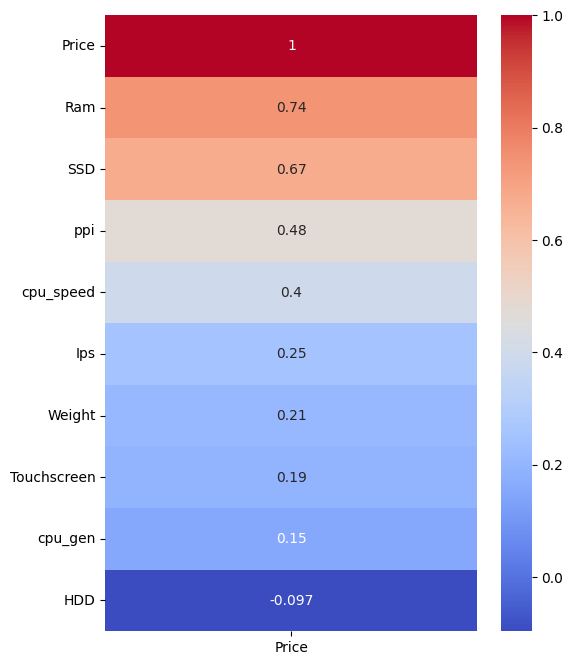

In [ ]:
corr_price = df.corr(numeric_only=True)['Price'].sort_values(ascending=False)

plt.figure(figsize=(6,8))
sns.heatmap(corr_price.to_frame(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df.sample(2)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,cpu_brand,cpu_gen,cpu_speed,HDD,SSD,Gpu brand,os
9,Acer,Ultrabook,8,1.6,41025.60,0,1,157.350512,Intel,8.0,1.6,0,256,Intel,Windows
856,Asus,Notebook,4,2.0,23922.72,0,0,100.454670,Intel,4.0,1.1,1000,0,Intel,Windows


In [ ]:
df.to_csv('laptop_updated_data.csv')

In [ ]:
x=df.drop(columns=['Price'])

In [ ]:
y=np.log(df['Price'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=2)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

**Linear Regression**

In [ ]:
step1= ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,12,13])],remainder='passthrough')
step2= LinearRegression()

pipe= Pipeline([('step1',step1),('step2',step2)])

pipe.fit(x_train,y_train)
y_pred= pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7951274609042445
MAE 0.22014132960807026


**Ridge Regression**

In [ ]:
step1= ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,12,13])],remainder='passthrough')
step2=Ridge()
pipe= Pipeline([('step1',step1),('step2',step2)])
param_grid = {
    'step2__alpha': [0.01, 0.1, 1, 10, 100],
    'step2__fit_intercept': [True, False]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2')
grid.fit(x_train,y_train)
y_pred= grid.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


R2 score 0.7957257488650902
MAE 0.21980273607447076
Best Params: {'step2__alpha': 0.1, 'step2__fit_intercept': True}
Best Score: 0.7879503976632792


**Lasso Regression**

In [ ]:
step1= ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,12,13])],remainder='passthrough')
step2 = Lasso(max_iter=10000)
pipe= Pipeline([('step1',step1),('step2',step2)])
param_grid = {
    'step2__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'step2__fit_intercept': [True, False],
    'step2__max_iter': [1000, 5000, 10000],
    'step2__selection': ['cyclic', 'random']
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(x_train, y_train)
y_pred = grid.best_estimator_.predict(x_test)

print("Best Params:", grid.best_params_)
print("Best Score (CV R2):", grid.best_score_)
print("Test R2 Score:", r2_score(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))

Best Params: {'step2__alpha': 0.0001, 'step2__fit_intercept': True, 'step2__max_iter': 10000, 'step2__selection': 'random'}
Best Score (CV R2): 0.7870819141733512
Test R2 Score: 0.7966882793108441
Test MAE: 0.21909031545037874


**KNN**

In [ ]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,12,13])
    ],
    remainder='passthrough'
)

# Step 2: KNN Regressor
step2 = KNeighborsRegressor()

# Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Hyperparameter Grid for KNN
param_grid = {
    'step2__n_neighbors': [3, 5, 7, 9, 11, 15, 20],   # number of neighbors
    'step2__weights': ['uniform', 'distance'],        # weighting strategy
    'step2__metric': ['euclidean', 'manhattan', 'minkowski'],  # distance metric
    'step2__p': [1, 2]   # power parameter for Minkowski (1=manhattan, 2=euclidean)
}

# Grid Search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid.fit(x_train, y_train)

# Predictions with best model
y_pred = grid.predict(x_test)

# Results
print("Best Params:", grid.best_params_)
print("Best CV R2 Score:", grid.best_score_)
print("Test R2 Score:", r2_score(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Best Params: {'step2__metric': 'manhattan', 'step2__n_neighbors': 7, 'step2__p': 1, 'step2__weights': 'distance'}
Best CV R2 Score: 0.791919025478468
Test R2 Score: 0.8430013909529281
Test MAE: 0.17937719048543088


**Decision Tree**

In [ ]:
step1 = ColumnTransformer(
    transformers=[('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,12,13])],
    remainder='passthrough'
)

# Step 2: Decision Tree Regressor
step2 = DecisionTreeRegressor(random_state=42)

# Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Hyperparameter grid
param_grid = {
    'step2__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'step2__splitter': ['best', 'random'],
    'step2__max_depth': [None, 5, 10, 20, 30, 50],
    'step2__min_samples_split': [2, 5, 10, 20],
    'step2__min_samples_leaf': [1, 2, 4, 10],
    'step2__max_features': [None, 'sqrt', 'log2']
}

# Grid Search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid.fit(x_train, y_train)

# Best parameters
print("Best Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# Test prediction using best model
y_pred = grid.best_estimator_.predict(x_test)
print("Test R2 score:", r2_score(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits
Best Params: {'step2__criterion': 'squared_error', 'step2__max_depth': 10, 'step2__max_features': None, 'step2__min_samples_leaf': 4, 'step2__min_samples_split': 2, 'step2__splitter': 'best'}
Best CV Score: 0.8022745808741985
Test R2 score: 0.822685537837909
Test MAE: 0.2010428275212199


**Random forest**

In [ ]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 12, 13])
    ],
    remainder='passthrough'
)

# Step 2: Random Forest Regressor
step2 = RandomForestRegressor(random_state=42)

# Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Hyperparameter grid for Random Forest
param_grid = {
    'step2__n_estimators': [100, 200, 500],        # number of trees
    'step2__max_depth': [None, 10, 20, 30],       # depth of trees
    'step2__min_samples_split': [2, 5, 10],       # minimum samples to split
    'step2__min_samples_leaf': [1, 2, 4],         # minimum samples per leaf
    'step2__max_features': ['sqrt', 'log2']  # number of features considered
}

# GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1,verbose=2)
grid.fit(x_train, y_train)

# Predictions
y_pred = grid.predict(x_test)

# Results
print("Best Params:", grid.best_params_)
print("Best CV Score (R²):", grid.best_score_)
print("Test R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Params: {'step2__max_depth': None, 'step2__max_features': 'log2', 'step2__min_samples_leaf': 1, 'step2__min_samples_split': 2, 'step2__n_estimators': 500}
Best CV Score (R²): 0.8796660244650978
Test R² Score: 0.9097462301150784
MAE: 0.14335321716338986


In [ ]:
import pickle

In [ ]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(grid.best_estimator_,open('pipe.pkl','wb'))